

*   Taller TITANIC
*   Juan Esteban Rivera y Victoria Chavarro



# Importación de librerias y datasets

In [197]:
#Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [198]:
#Importación del dataset
data = pd.read_csv ('train.csv')
test = pd.read_csv ('test.csv')

# Entendimiento TRAIN dataset

In [199]:
data.shape

(891, 12)

In [200]:
# tipos de datos de las variables
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [201]:
#chequeo de nulos en el dataset
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [202]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Modificacion TRAIN dataset


In [203]:
#eliminacion de variables de valores unicos
data = data.drop(["Ticket", "Name","Cabin",'PassengerId'], axis=1)

**Reducción de dimensionalidad:** Las variables con valores únicos para cada observación no aportan variabilidad al modelo y, por lo tanto, no contribuyen a la capacidad predictiva.

**Evitar sobreajuste (overfitting):** Eliminar variables con valores únicos puede ayudar a prevenir el sobreajuste, ya que estas variables no proporcionarán información útil para hacer predicciones en datos no vistos.

**Eficiencia computacional:** Al reducir el número de variables, se puede mejorar la eficiencia computacional durante el entrenamiento del modelo.

**Facilitar la interpretación:** Al eliminar variables con valores únicos, se simplifica la estructura del modelo y facilita la comprensión de la relación entre las características y la variable objetivo.


In [204]:
# llenar los valores faltantes en la columna 'Embarked' con el valor más frecuente (moda)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

Llenar los valores faltantes con la moda en este contexto específico proporciona una solución práctica y eficiente que mantiene la coherencia con la distribución original de los datos y minimiza el impacto en las estadísticas descriptivas.

In [205]:
# correlación de las variables con AGE
correlation_matrix = data.corr()
correlation_with_age = correlation_matrix['Age'].sort_values(ascending=False)
print(correlation_with_age)


Age         1.000000
Fare        0.096067
Survived   -0.077221
Parch      -0.189119
SibSp      -0.308247
Pclass     -0.369226
Name: Age, dtype: float64


<ipython-input-205-af5c975af3f6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [206]:
# Calcula la mediana de la edad por clase socioeconómica
median_age_by_pclass = data.groupby('Pclass')['Age'].median()

# Función para llenar los valores nulos en Age
def fill_age_nulls(row):
    if pd.isnull(row['Age']):
        return median_age_by_pclass[row['Pclass']]
    else:
        return row['Age']

# Aplica la función para llenar los valores nulos en Age
data['Age'] = data.apply(fill_age_nulls, axis=1)


Se notó que hay una gran relación entre Pclass y Age. Por lo que, Esta estrategia de imputación busca ser específica y sensible a la estructura de los datos, adaptándose a las diferencias entre las clases socioeconómicas y reduciendo el riesgo de sesgo en la imputación de edades faltantes.

In [207]:
# Mostrar las primeras filas del DataFrame resultante
print(data.head(10))


   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
5         0       3    male  24.0      0      0   8.4583        Q
6         0       1    male  54.0      0      0  51.8625        S
7         0       3    male   2.0      3      1  21.0750        S
8         1       3  female  27.0      0      2  11.1333        S
9         1       2  female  14.0      1      0  30.0708        C


In [208]:
#chequeo de nulos en el dataset despues de transformación
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Estandarizar la columna 'Fare' se hizo para garantizar una comparación justa entre variables, mejorar el rendimiento del modelo, ayudar a que el modelo converja más rápidamente y mejorar la eficiencia del proceso de entrenamiento..

<Axes: >

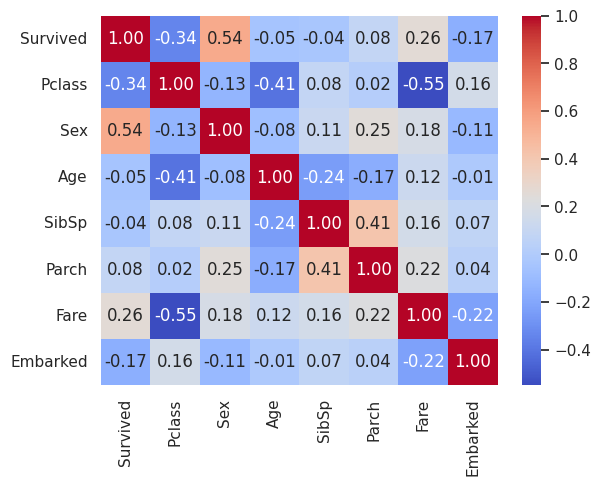

In [209]:
# Codificar etiquetas para la variable 'Sex'
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Codificar etiquetas para la variable 'Embarked'
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

#matriz de correlación y mapa de calor
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

La codificación de etiquetas para las variables 'Sex' y 'Embarked' se realiza con el objetivo de convertir variables categóricas en formato de texto en valores numéricos.

1. La tarifa del boleto exhibe una relación inversamente proporcional con la clase del pasajero. En otras palabras, los pasajeros de primera clase tienden a pagar tarifas más altas en comparación con los de clases inferiores.

2. La relación limitada de la variable objetivo con las demás variables independientes sugiere la ausencia de una correlación lineal evidente. No obstante, esta observación no descarta la posibilidad de una correlación no lineal entre las variables, lo que podría requerir un análisis más avanzado para ser completamente comprendido.

REGRESIÓN LOGISTICA


In [210]:

# División del conjunto de datos
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Análisis de coeficientes
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)


    Feature  Coefficient
1       Sex     1.276354
5      Fare     0.116262
4     Parch    -0.096467
6  Embarked    -0.161224
3     SibSp    -0.359925
2       Age    -0.431549
0    Pclass    -0.832309


In [211]:
# Eliminación de características con coeficientes cercanos a cero
features_to_remove = ['Embarked', 'Parch','Fare']
data = data.drop(features_to_remove, axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp
0,0,3,0,22.0,1
1,1,1,1,38.0,1
2,1,3,1,26.0,0
3,1,1,1,35.0,1
4,0,3,0,35.0,0


La eliminación de características con coeficientes cercanos a cero después de realizar la regresión logística se hizo para simplificar y mejorar el rendimiento del modelo.

# Visualizaciones TRAIN dataset

In [212]:
# Establecer estilo
sns.set(style="whitegrid")

<ipython-input-213-065debea68a2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='Set2')


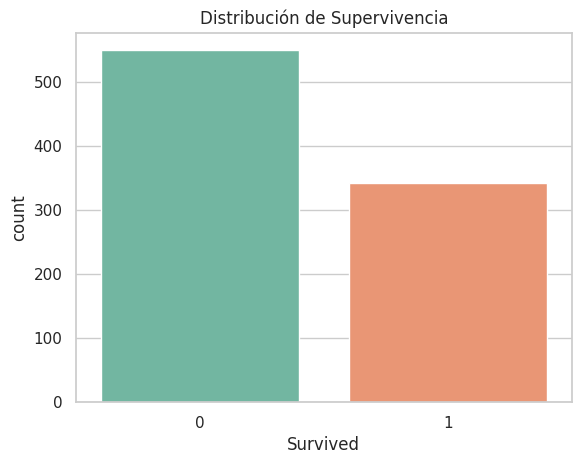

In [213]:
# 1. Distribución de Supervivencia
sns.countplot(x='Survived', data=data, palette='Set2')
plt.title('Distribución de Supervivencia')
plt.show()

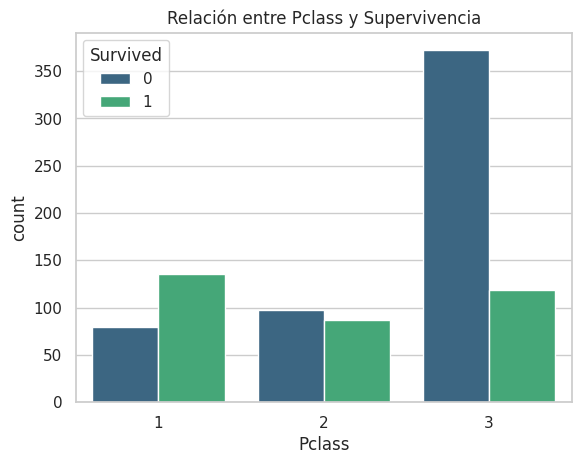

In [214]:
# 2. Relación entre Pclass y Supervivencia
sns.countplot(x='Pclass', hue='Survived', data=data, palette='viridis')
plt.title('Relación entre Pclass y Supervivencia')
plt.show()

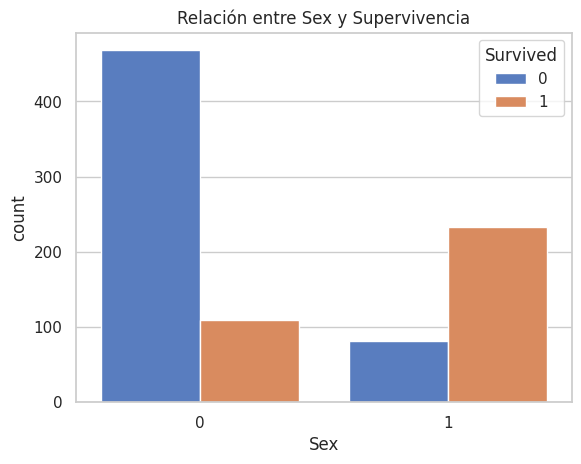

In [215]:
# 3. Relación entre Sex y Supervivencia
sns.countplot(x='Sex', hue='Survived', data=data, palette='muted')
plt.title('Relación entre Sex y Supervivencia')
plt.show()


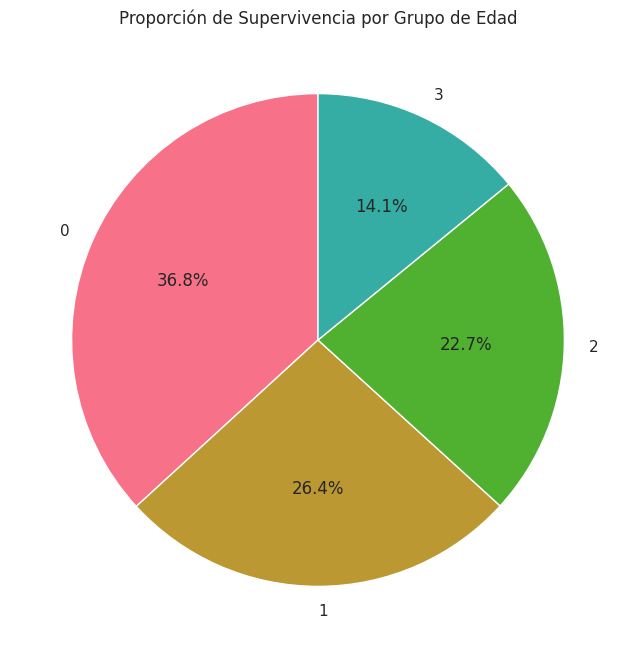

In [216]:
# Definir los bins y las etiquetas para la variable 'AgeGroup'
age_bins = [0, 10, 18, 60, float('inf')]
age_labels = [0, 1, 2, 3]

# Crear la columna 'AgeGroup' usando la función cut
data["AgeGroup"] = pd.cut(data["Age"], bins=age_bins, labels=age_labels)

# Calcular la proporción de supervivencia en cada grupo de edad
survival_ratio = data.groupby('AgeGroup')['Survived'].mean()

# Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(survival_ratio, labels=survival_ratio.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl"))
plt.title('Proporción de Supervivencia por Grupo de Edad')
plt.show()


In [217]:

# Definir los intervalos de edad y asignarles el valor correspondiente de AgeGroup
age_bins = [0, 20, 40, 60, 80]
age_labels = [0, 1, 2, 3]

# Crear la variable 'AgeGroup' en el conjunto de datos 'data'
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Eliminar la variable 'Age' del conjunto de datos 'data'
data = data.drop('Age', axis=1)



Se ha creado la variable 'AgeGroup' a partir de la variable continua 'Age' en el conjunto de datos para simplificar el modelo y capturar posibles patrones no lineales en la relación entre la edad y la variable objetivo. Al dividir la edad en grupos, se facilita la interpretación del impacto de la edad en la variable objetivo y se evita la multicolinealidad potencial con la variable 'Age'.

In [218]:
data.head()

,Survived,Pclass,Sex,SibSp,AgeGroup
0,0,3,0,1,1
1,1,1,1,1,1
2,1,3,1,0,1
3,1,1,1,1,1
4,0,3,0,0,1


# Transformaciones TEST dataset

In [219]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [220]:
test.shape

(418, 11)

In [221]:
#chequeo de nulos en el dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [222]:
#eliminacion de variables de valores unicos
test = test.drop(["Ticket", "Name", "Cabin",'PassengerId'], axis=1)

**Reducción de dimensionalidad:** Las variables con valores únicos para cada observación no aportan variabilidad al modelo y, por lo tanto, no contribuyen a la capacidad predictiva.

**Evitar sobreajuste (overfitting):** Eliminar variables con valores únicos puede ayudar a prevenir el sobreajuste, ya que estas variables no proporcionarán información útil para hacer predicciones en datos no vistos.

**Eficiencia computacional:** Al reducir el número de variables, se puede mejorar la eficiencia computacional durante el entrenamiento del modelo.

**Facilitar la interpretación:** Al eliminar variables con valores únicos, se simplifica la estructura del modelo y facilita la comprensión de la relación entre las características y la variable objetivo.


In [223]:
# Calcula la mediana de la edad por clase socioeconómica
median_age_by_pclass = test.groupby('Pclass')['Age'].median()

# Función para llenar los valores nulos en Age
def fill_age_nulls(row):
    if pd.isnull(row['Age']):
        return median_age_by_pclass[row['Pclass']]
    else:
        return row['Age']

# Aplica la función para llenar los valores nulos en Age
test['Age'] = test.apply(fill_age_nulls, axis=1)


#llenar el vacio de fare con el promedio
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
nulos_edad=test['Age'].isnull().sum()
print(f'Totales de nulos en variable age: {nulos_edad}')

Totales de nulos en variable age: 0


Se notó que hay una gran relación entre Pclass y Age. Por lo que, Esta estrategia de imputación busca ser específica y sensible a la estructura de los datos, adaptándose a las diferencias entre las clases socioeconómicas y reduciendo el riesgo de sesgo en la imputación de edades faltantes.

También, optamos por llenar el único valor faltante en fare con el promedio porque se intenta preservar la tendencia general de las tarifas y evitar la pérdida potencial de información al eliminar filas con valores faltantes.

In [224]:
# Codificar etiquetas para la variable 'Sex'
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# Codificar etiquetas para la variable 'Embarked'
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

La codificación de etiquetas para las variables 'Sex' y 'Embarked' se realiza con el objetivo de convertir variables categóricas en formato de texto en valores numéricos.

In [225]:
# Crear la variable 'AgeGroup' en el conjunto de datos de prueba 'test'
test['AgeGroup'] = pd.cut(test['Age'], bins=age_bins, labels=age_labels, right=False)

# Eliminar la variable 'Age' del conjunto de datos de prueba 'test'
test = test.drop('Age', axis=1)

test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup
0,3,0,0,0,7.8292,1,1
1,3,1,1,0,7.0000,2,2
2,2,0,0,0,9.6875,1,3
3,3,0,0,0,8.6625,2,1
4,3,1,1,1,12.2875,2,1


In [226]:
# Eliminación de características con coeficientes cercanos a cero
features_to_remove = ['Embarked', 'Parch','Fare']
test = test.drop(features_to_remove, axis=1)

In [227]:
test.head()

,Pclass,Sex,SibSp,AgeGroup
0,3,0,0,1
1,3,1,1,2
2,2,0,0,3
3,3,0,0,1
4,3,1,1,1


# MODELO SVM


In [234]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

# División del conjunto de datos
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalización de datos con Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir la matriz NumPy a DataFrame de Pandas manteniendo los nombres de las columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Entrenamiento del modelo SVM
model = SVC(kernel='linear', C=1.0, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Obtener los coeficientes y las variables usadas en el modelo
coefficients = model.coef_.flatten()
important_features = X_train.columns[np.abs(coefficients) > 0]  # Ajusta el umbral según sea necesario

# Imprimir las variables
print("\nVariables más importantes según coeficientes:")
print(important_features)

# Predicción en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluación del modelo en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)



Variables más importantes según coeficientes:
Index(['Pclass', 'Sex', 'SibSp', 'AgeGroup'], dtype='object')

Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       168
           1       0.72      0.71      0.71       100

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



[[140  28]
 [ 29  71]]


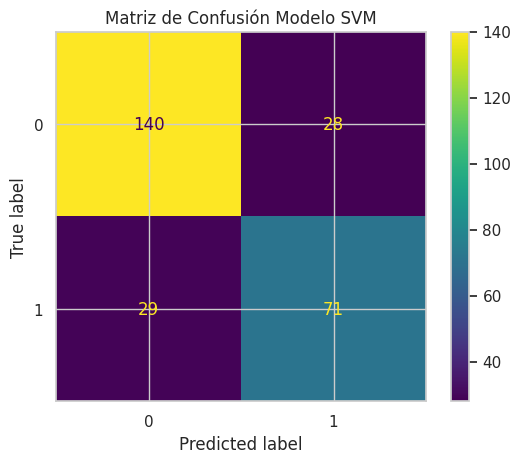

In [229]:
#creación de matriz de confusión
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
dis= ConfusionMatrixDisplay(confusion_matrix=matrix)
dis.plot()
plt.title('Matriz de Confusión Modelo SVM')
plt.show()

140 son los verdaderos negativos (TN)
28 son los falsos positivos (FP)
29 son los falsos negativos (FN)
71 son los verdaderos positivos (TP)

# Validación del modelo

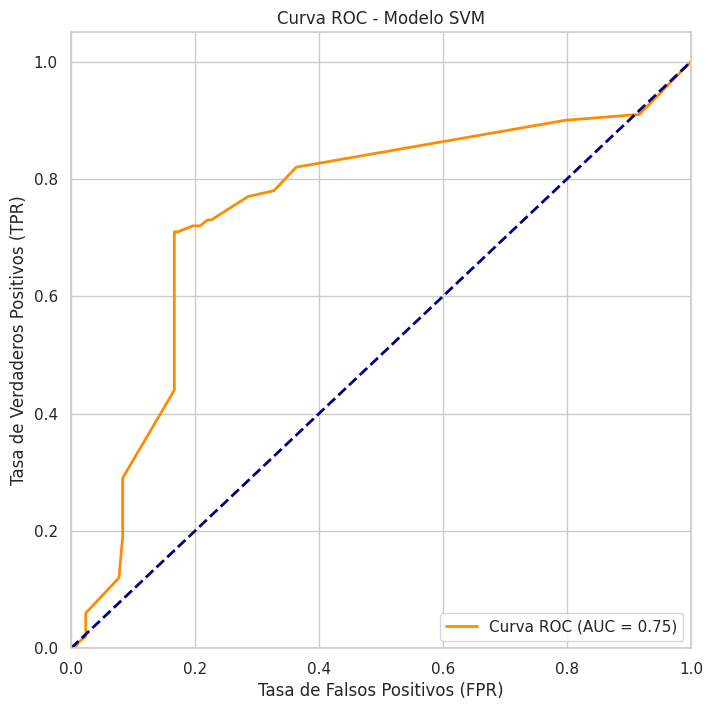

In [230]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de las predicciones positivas
y_scores = model.decision_function(X_test_scaled)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Modelo SVM')
plt.legend(loc="lower right")
plt.show()


In [231]:
from sklearn.model_selection import cross_val_score, KFold

# Definir el número de divisiones para la validación cruzada
num_folds = 10

# Inicializar el objeto de validación cruzada KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Realizar validación cruzada con el modelo existente
cv_scores = cross_val_score(model, X, y, cv=kf)

# Imprimir los puntajes de validación cruzada
print("Puntajes de validación cruzada:", cv_scores)

# Calcular e imprimir el puntaje de validación cruzada promedio
mean_cv_score = cv_scores.mean()
print("Puntaje de validación cruzada promedio:", mean_cv_score)

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3

Puntajes de validación cruzada: [0.81111111 0.75280899 0.80898876 0.71910112 0.85393258 0.83146067
 0.74157303 0.74157303 0.75280899 0.86516854]
Puntaje de validación cruzada promedio: 0.7878526841448189


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


# Creación de salida en base al dataset TEST

In [232]:
#Se le da al modelo ya entrenado los datos de Prueba con el objetivo de que crear la salida necesaria para KAGGLE
y_pred = model.predict(test)

test = pd.read_csv ('test.csv')
PassengerId = test['PassengerId']

test_predict = pd.DataFrame({
    "PassengerId":PassengerId,
    "Survived":y_pred
})
test_predict.to_csv('predict.csv',index=False)